In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CDNOW.txt',sep = '\s+',names = ['用户ID','购买日期','购买数量','购买金额'])

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
用户ID    69659 non-null int64
购买日期    69659 non-null int64
购买数量    69659 non-null int64
购买金额    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


,用户ID,购买日期,购买数量,购买金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


# 一、商品销售静动态分析

## 1.各订单购买数量和趋势分析

In [4]:
quantity_count = data['购买数量'].value_counts().reset_index()
quantity_count.rename(columns={"index":'购买数量','购买数量':'订单数量'},inplace = True)
quantity_count

,购买数量,订单数量
0,1,31454
1,2,16070
2,3,9444
3,4,5015
4,5,2792
5,6,1627
6,7,1057
7,8,684
8,9,403
9,10,293


In [5]:
data['购买数量'].describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: 购买数量, dtype: float64

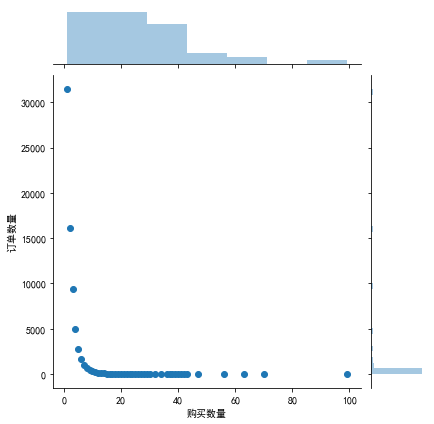

In [6]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.jointplot(x = '购买数量',y = '订单数量',data = quantity_count)

综上，可看出，购买数量基本都在3件以内，在42件后出现断层，疑似异常值。

In [7]:
data[data.购买数量 > 42]

,用户ID,购买日期,购买数量,购买金额
23565,7592,19970203,47,563.59
26686,8529,19970228,56,756.47
27632,8830,19980610,99,1286.01
32495,10550,19970303,43,669.93
65950,22279,19970726,63,915.10
65951,22279,19970727,56,831.35
69416,23474,19970607,70,932.23


## 2.各订单购买金额和趋势分析

In [8]:
data['购买金额'].describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: 购买金额, dtype: float64

In [9]:
data[data.购买金额 == 0]

,用户ID,购买日期,购买数量,购买金额
1548,455,19970102,1,0.0
2446,713,19970103,1,0.0
3066,908,19970104,1,0.0
3118,925,19970104,1,0.0
3623,1101,19970105,1,0.0
3849,1186,19970105,1,0.0
3943,1225,19970105,1,0.0
4329,1381,19970106,1,0.0
4398,1401,19970106,1,0.0
5617,1753,19970107,1,0.0


In [10]:
cost_count = data['购买金额'].value_counts().reset_index()
cost_count.rename(columns={"index":'购买金额','购买金额':'订单数量'},inplace = True)
cost_count

,购买金额,订单数量
0,11.77,2325
1,14.96,2027
2,13.97,1982
3,12.99,1406
4,14.37,1405
5,15.36,1403
6,12.49,953
7,14.99,866
8,13.99,733
9,11.49,728


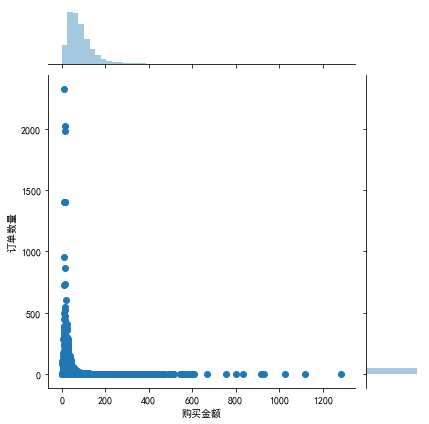

In [11]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.jointplot(x = '购买金额',y = '订单数量',data = cost_count)

In [12]:
cost_count['金额区间'] = cost_count.购买金额.apply(lambda x : '[0,10)' if 0 <= x < 10 
                                           else '[10,20)' if 10<= x < 20 
                                           else '[20,30)' if 20 <= x < 30 
                                           else '[30,40)' if 30<= x < 40 
                                           else '[40,50)' if 40 <= x < 50 
                                           else '[50,60)' if 50 <= x <60 
                                           else '[60,80)' if 60 <= x < 80 
                                           else '[80,130)' if 80 <= x < 130  
                                           else '[130,220)' if 130 <= x < 220 
                                           else '(>= 220)')
cost_zone =  cost_count.groupby('金额区间')['订单数量'].sum().reset_index()
list_rows = ['[0,10)','[10,20)','[20,30)','[30,40)','[40,50)','[50,60)','[60,80)','[80,130)','[130,220)','(>= 220)']
cost_zone.金额区间 = cost_zone.金额区间.astype('category')
cost_zone.金额区间.cat.reorder_categories(list_rows, inplace=True)
cost_zone.sort_values('金额区间', inplace=True)
cost_zone

,金额区间,订单数量
1,"[0,10)",3805
2,"[10,20)",24483
4,"[20,30)",13449
5,"[30,40)",7735
6,"[40,50)",6163
7,"[50,60)",4188
8,"[60,80)",4356
9,"[80,130)",3923
3,"[130,220)",1211
0,(>= 220),346


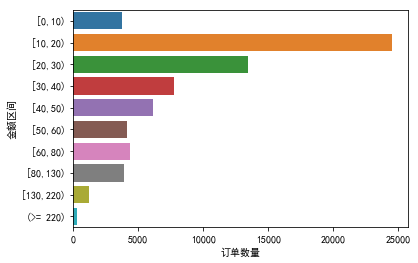

In [13]:
sns.barplot(x = '订单数量',y = '金额区间' ,data = cost_zone)

综上，订单金额集中分布在[10,30]的价格区间，大体都在220元以下。另，有80单金额为0，可能为赠品或异常值

# 二、用户消费行为动静态分析

## 1.各用户累积购买数量分析

### 1.1各用户累积购买数量分析

In [14]:
quantity_sum = data.groupby('用户ID')['购买数量'].agg({'累积购买数量':np.sum}).reset_index()
quantity_sum

,用户ID,累积购买数量
0,1,1
1,2,6
2,3,16
3,4,7
4,5,29
5,6,1
6,7,18
7,8,18
8,9,6
9,10,3


In [15]:
quantity_sum.累积购买数量.value_counts()

1       6809
2       3933
3       2425
4       1731
5       1314
6        973
7        761
8        655
9        510
10       432
12       376
11       354
13       297
14       252
15       225
16       201
17       182
20       156
18       151
19       136
22       117
21       100
23        99
24        96
25        84
26        82
27        80
28        67
30        57
35        51
        ... 
1033       1
152        1
136        1
120        1
301        1
73         1
143        1
263        1
183        1
135        1
119        1
105        1
121        1
169        1
102        1
195        1
157        1
94         1
917        1
101        1
106        1
126        1
292        1
164        1
328        1
116        1
84         1
330        1
222        1
159        1
Name: 累积购买数量, Length: 154, dtype: int64

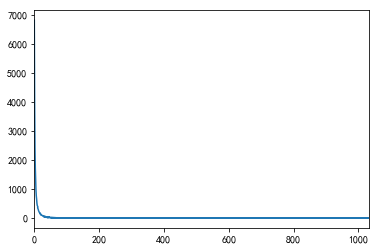

In [16]:
quantity_sum.累积购买数量.value_counts().plot()

各用户累积购买数量呈递减趋势，集中分布在20件以内

### 1.2各用户购买数量累积贡献分析

In [17]:
quantity_sum['购买数量累积贡献'] = (quantity_sum.累积购买数量 / quantity_sum.累积购买数量.sum())
quantity_sum

,用户ID,累积购买数量,购买数量累积贡献
0,1,1,0.000006
1,2,6,0.000036
2,3,16,0.000095
3,4,7,0.000042
4,5,29,0.000173
5,6,1,0.000006
6,7,18,0.000107
7,8,18,0.000107
8,9,6,0.000036
9,10,3,0.000018


### 1.3各用户最大单笔购买数量分析

In [18]:
quantity_max = data.groupby('用户ID')['购买数量'].agg({'最大购买数量':max}).reset_index()
quantity_max

,用户ID,最大购买数量
0,1,1
1,2,5
2,3,5
3,4,2
4,5,4
5,6,1
6,7,9
7,8,7
8,9,2
9,10,3


## 2.各用户购买金额分析

### 2.1各用户累积购买金额分析

In [19]:
cost_sum = data.groupby('用户ID')['购买金额'].agg({'累积购买金额':np.sum}).reset_index()
cost_sum

,用户ID,累积购买金额
0,1,11.77
1,2,89.00
2,3,156.46
3,4,100.50
4,5,385.61
5,6,20.99
6,7,264.67
7,8,197.66
8,9,95.85
9,10,39.31


### 2.2各用户购买金额累积贡献分析

In [20]:
cost_sum['购买金额累积贡献'] = (cost_sum.累积购买金额 / cost_sum.累积购买金额.sum())
cost_sum

,用户ID,累积购买金额,购买金额累积贡献
0,1,11.77,0.000005
1,2,89.00,0.000036
2,3,156.46,0.000063
3,4,100.50,0.000040
4,5,385.61,0.000154
5,6,20.99,0.000008
6,7,264.67,0.000106
7,8,197.66,0.000079
8,9,95.85,0.000038
9,10,39.31,0.000016


### 2.3各用户最大单笔消费金额分析

In [21]:
cost_max = data.groupby('用户ID')['购买金额'].agg({'最大消费金额':max}).reset_index()
cost_max

,用户ID,最大消费金额
0,1,11.77
1,2,77.00
2,3,57.45
3,4,29.73
4,5,46.46
5,6,20.99
6,7,138.50
7,8,50.43
8,9,41.98
9,10,39.31


## 3.各用户购买次数分析

In [22]:
buytime = data.groupby('用户ID')['购买金额'].agg({'购买次数': len}).reset_index()
buytime

,用户ID,购买次数
0,1,1.0
1,2,2.0
2,3,6.0
3,4,4.0
4,5,11.0
5,6,1.0
6,7,3.0
7,8,8.0
8,9,3.0
9,10,1.0


## 4.各用户第一次购买时间分析

In [23]:
data_sort = data.sort_values(by = ['用户ID','购买日期'])
data_sort.用户ID.astype('str')
data_sort

,用户ID,购买日期,购买数量,购买金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [24]:
first_time = data_sort.groupby('用户ID')['用户ID','购买日期'].head(1)
first_time

,用户ID,购买日期
0,1,19970101
1,2,19970112
3,3,19970102
9,4,19970101
13,5,19970101
24,6,19970101
25,7,19970101
28,8,19970101
36,9,19970101
39,10,19970121


## 5.各用户最后一次购买时间分析

In [25]:
last_time = data_sort.groupby('用户ID')['用户ID','购买日期'].tail(1)
last_time

,用户ID,购买日期
0,1,19970101
2,2,19970112
8,3,19980528
12,4,19971212
23,5,19980103
24,6,19970101
27,7,19980322
35,8,19980329
38,9,19980608
39,10,19970121


## 6.各用户最后（近）一次消费与当前时间间隔

In [26]:
import datetime as dt
from dateutil.parser import parse

In [27]:
last_time['购买日期'] = last_time.购买日期.apply(lambda x : parse(str(x)))
last_time['最近消费时间间隔(天)'] = (pd.datetime.now() - last_time.购买日期).dt.days
last_time

,用户ID,购买日期,最近消费时间间隔(天)
0,1,1997-01-01,8231
2,2,1997-01-12,8220
8,3,1998-05-28,7719
12,4,1997-12-12,7886
23,5,1998-01-03,7864
24,6,1997-01-01,8231
27,7,1998-03-22,7786
35,8,1998-03-29,7779
38,9,1998-06-08,7708
39,10,1997-01-21,8211


## 7.各用户生命周期分析

In [28]:
first_time['购买日期'] = first_time.购买日期.apply(lambda x : parse(str(x)))

In [29]:
lifecycle = pd.merge(last_time,first_time,on = '用户ID',suffixes=('last','first'),how = 'right')
lifecycle['生命周期'] = lifecycle.购买日期last - lifecycle.购买日期first
lifecycle

,用户ID,购买日期last,最近消费时间间隔(天),购买日期first,生命周期
0,1,1997-01-01,8231,1997-01-01,0 days
1,2,1997-01-12,8220,1997-01-12,0 days
2,3,1998-05-28,7719,1997-01-02,511 days
3,4,1997-12-12,7886,1997-01-01,345 days
4,5,1998-01-03,7864,1997-01-01,367 days
5,6,1997-01-01,8231,1997-01-01,0 days
6,7,1998-03-22,7786,1997-01-01,445 days
7,8,1998-03-29,7779,1997-01-01,452 days
8,9,1998-06-08,7708,1997-01-01,523 days
9,10,1997-01-21,8211,1997-01-21,0 days


## 8.各用户首次回购周期

In [30]:
meantimes = data[['用户ID','购买日期']].sort_values(by =['用户ID','购买日期']).drop_duplicates()
meantimes['购买日期'] = meantimes.购买日期.apply(lambda x : parse(str(x)))
meantimes['复购周期'] = meantimes.groupby('用户ID').shift(1)
meantimes['复购周期'] = meantimes['购买日期'] - meantimes['复购周期']
meantimes

,用户ID,购买日期,复购周期
0,1,1997-01-01,NaT
1,2,1997-01-12,NaT
3,3,1997-01-02,NaT
4,3,1997-03-30,87 days
5,3,1997-04-02,3 days
6,3,1997-11-15,227 days
7,3,1997-11-25,10 days
8,3,1998-05-28,184 days
9,4,1997-01-01,NaT
10,4,1997-01-18,17 days


In [31]:
first_meantime = meantimes.dropna().groupby('用户ID')['用户ID','购买日期','复购周期'].head(1)
first_meantime

,用户ID,购买日期,复购周期
4,3,1997-03-30,87 days
10,4,1997-01-18,17 days
14,5,1997-01-14,13 days
26,7,1997-10-11,283 days
29,8,1997-02-13,43 days
37,9,1997-05-13,132 days
41,11,1997-01-28,27 days
49,16,1997-07-13,193 days
55,19,1997-06-10,160 days
57,20,1997-01-18,17 days


## 9.各用户平均购买周期

In [32]:
avg_meantime = meantimes.dropna()
avg_meantime['复购周期'] = meantimes.复购周期.dt.days
avg_meantime = avg_meantime.groupby('用户ID')['复购周期'].apply(lambda x: (np.sum(x) / len(x))).reset_index()
avg_meantime.rename(columns = {'复购周期':'平均购买周期'},inplace = True)
avg_meantime

,用户ID,平均购买周期
0,3,102.200000
1,4,115.000000
2,5,36.700000
3,7,222.500000
4,8,75.333333
5,9,261.500000
6,11,138.333333
7,16,84.000000
8,19,160.000000
9,20,17.000000


## 10.各用户各月复购率

In [33]:
meantimes['购买日期'] = meantimes.购买日期.apply(lambda x : (str(x).split('-')[0] + '-' +str(x).split('-')[1]))
meantimes

,用户ID,购买日期,复购周期
0,1,1997-01,NaT
1,2,1997-01,NaT
3,3,1997-01,NaT
4,3,1997-03,87 days
5,3,1997-04,3 days
6,3,1997-11,227 days
7,3,1997-11,10 days
8,3,1998-05,184 days
9,4,1997-01,NaT
10,4,1997-01,17 days


In [34]:
buy_record = meantimes.pivot_table(columns = '购买日期',index = '用户ID',values = '复购周期',aggfunc = len).fillna(0)
buy_record  #值为每个用户当月购买次数

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
col_list = buy_record.columns
for col , values in enumerate(buy_record):
    more = buy_record[buy_record.iloc[:,col].values > 1].shape[0] 
    total = buy_record[buy_record.iloc[:,col].values > 0].shape[0] 
    rate_fg = more / total
    print('{} 复购率：{}'.format(col_list[col],rate_fg))

1997-01 复购率：0.09597247004843232
1997-02 复购率：0.11024602927436936
1997-03 复购率：0.14384712305753886
1997-04 复购率：0.21048901488306165
1997-05 复购率：0.18654019873532068
1997-06 复购率：0.18255664814023087
1997-07 复购率：0.20045871559633027
1997-08 复购率：0.18171557562076748
1997-09 复购率：0.1891891891891892
1997-10 复购率：0.19032082653616095
1997-11 复购率：0.1844181459566075
1997-12 复购率：0.1990343347639485
1998-01 复购率：0.19193233571893298
1998-02 复购率：0.18504190844616378
1998-03 复购率：0.21019417475728155
1998-04 复购率：0.18232428670842032
1998-05 复购率：0.1875
1998-06 复购率：0.1952191235059761


## 11.各用户各月回购率

In [36]:
col_list = buy_record.columns
for col , values in enumerate(buy_record):
    if col >= 1:
        hg = buy_record[(buy_record.iloc[:,col - 1].values > 0)&(buy_record.iloc[:,col].values > 0)].shape[0] 
        total = buy_record[buy_record.iloc[:,col -1].values > 0].shape[0] 
        rate_hg = hg / total
        print('{} 回购率：{}'.format(col_list[col - 1],rate_hg))

1997-01 回购率：0.1474636757583482
1997-02 回购率：0.17450430810754697
1997-03 回购率：0.1861612767744645
1997-04 回购率：0.30191353649893693
1997-05 回购率：0.33739837398373984
1997-06 回购率：0.3189397178281317
1997-07 回购率：0.27706422018348625
1997-08 回购率：0.2979683972911964
1997-09 回购率：0.30592294422081656
1997-10 回购率：0.33931484502446985
1997-11 回购率：0.3116370808678501
1997-12 回购率：0.27467811158798283
1998-01 回购率：0.30709173715029275
1998-02 回购率：0.36814958091553834
1998-03 回购率：0.25145631067961166
1998-04 回购率：0.31941544885177453
1998-05 回购率：0.29973118279569894


## 12.各用户各月留存率

In [37]:
def encode_units(x):
    if x <= 0:
        return None
    else:
        return 1
buy_record_re = buy_record.applymap(encode_units)
buy_record_re

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
9,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [38]:
col_list = buy_record_re.columns
for col , values in enumerate(buy_record):
    lc = buy_record_re[buy_record_re.iloc[:,:(col+1)].T.sum() == (col+1)].shape[0]
    all_customer = buy_record_re.shape[0] 
    rate_lc = lc / all_customer
    print('{} 留存率：{}'.format(col_list[col],rate_lc))

1997-01 留存率：0.33288078065337295
1997-02 留存率：0.049087823504454814
1997-03 留存率：0.015655494272380145
1997-04 留存率：0.007467119219346627
1997-05 留存率：0.004751803139584217
1997-06 留存率：0.0032668646584641495
1997-07 留存率：0.002291047942299533
1997-08 留存率：0.0014425116673737802
1997-09 留存率：0.0008485362749257531
1997-10 留存率：0.0007212558336868901
1997-11 留存率：0.0006788290199406025
1997-12 留存率：0.0005515485787017395
1998-01 留存率：0.0005515485787017395
1998-02 留存率：0.00042426813746287653
1998-03 留存率：0.00038184132371658886
1998-04 留存率：0.0002969876962240136
1998-05 留存率：0.0002545608824777259
1998-06 留存率：0.0002545608824777259


## 13.用户分层（活跃用户和回流用户比率）

1.未定义回流用户及活跃用户，未定义断购周期。这里暂定在97年-98年内，中间断购，后续有复购记录的用户即为回流用户；活跃用户为未出现断购的用户，按各月的购买记录分析。

In [39]:
active_c = buy_record_re[buy_record_re.T.notnull().all()]
active_c

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
2484,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3049,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3638,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4459,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7592,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7931,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [40]:
buy_record_final = buy_record_re.fillna(0)
buy_record_final

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
#return_c_num = 0
#return_index = []
#for row in buy_record_final.index:
#    if buy_record_final.loc[row].sum() >= 2:
#        for col in range(buy_record_final.shape[1] - 1):
#            if col >= 1 :
#                if (buy_record_final.iloc[row,col].astype(int) == 0) & (buy_record_final.iloc[row,col-1].astype(int) == 1) & (buy_record_final.iloc[row,:col].T.sum().astype(int) == 1):
#                    return_c_num += 1
#                    return_index.append(row)
#                    break
#

2.参考 链接：https://www.jianshu.com/p/3233a513d9da 
#新用户的定义是第一次消费。
#活跃用户即老客，在某一个时间窗口内有过消费。
#不活跃用户则是时间窗口内没有消费过的老客。
#回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。

In [45]:
def active_status(X):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if X[i]==0:
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append('unreg')#前面某月没有消费过，则本月也不是新客
         #若本月消费
        else:
            if len(status)==0:#前面没有消费过
                status.append('new')#则为新客
            else:#前面消费过
                if status[i-1] =='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':#前一个月没有消费，不是新客
                    status.append('new')
                else:#前一个月是首次消费
                    status.append('active')#本月为活跃用户
                    
    return status

In [53]:
#可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、unactive=流失）,unreg相当于未注册，指这个用户在这个月及以前从未购买过产品，主要为了统计起来更加方便而加进去。
indexs = buy_record_final.columns.sort_values().astype('str').unique()
df = buy_record_final.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
df.head()

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [78]:
#把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把月份作为索引行，状态作为列，得到如下的表
df1=df.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T.reset_index()
df1

,购买日期,active,new,return,unactive
0,1997-01,0.0,7846.0,0.0,0.0
1,1997-02,1157.0,8476.0,0.0,6689.0
2,1997-03,1681.0,7248.0,595.0,14046.0
3,1997-04,1773.0,0.0,1049.0,20748.0
4,1997-05,852.0,0.0,1362.0,21356.0
5,1997-06,747.0,0.0,1592.0,21231.0
6,1997-07,746.0,0.0,1434.0,21390.0
7,1997-08,604.0,0.0,1168.0,21798.0
8,1997-09,528.0,0.0,1211.0,21831.0
9,1997-10,532.0,0.0,1307.0,21731.0


从表中可以看出，新客都是集中在前三个月，回流用户整体在1000左右，而不活跃用户数量随时间稍有上升。

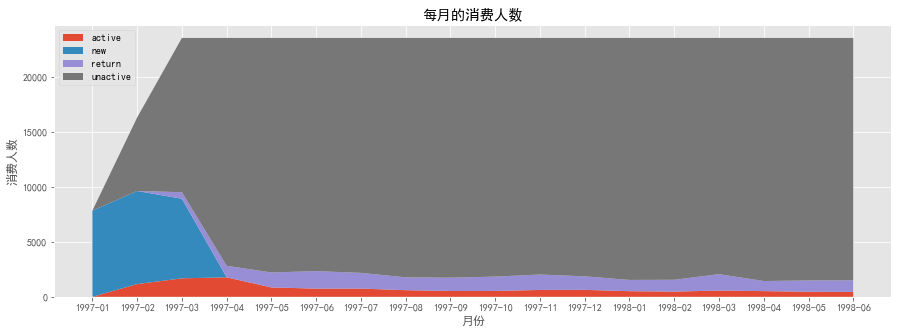

In [79]:
#作出非堆积效果图：
plt.style.use('ggplot')
labels = df1[['active','new','return','unactive']].columns
plt.figure(figsize=(15,5))
plt.stackplot(df1['购买日期'], df1['active'],df1['new'],df1['return'],df1['unactive'], labels=labels)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月的消费人数')
plt.legend(loc = 'upper left');

In [80]:
df1.iloc[:,1:] = df1.iloc[:,1:].apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例

In [81]:
df1

,购买日期,active,new,return,unactive
0,1997-01,0.000000,1.000000,0.000000,0.000000
1,1997-02,0.070886,0.519299,0.000000,0.409815
2,1997-03,0.071319,0.307510,0.025244,0.595927
3,1997-04,0.075223,0.000000,0.044506,0.880272
4,1997-05,0.036148,0.000000,0.057785,0.906067
5,1997-06,0.031693,0.000000,0.067543,0.900764
6,1997-07,0.031650,0.000000,0.060840,0.907510
7,1997-08,0.025626,0.000000,0.049555,0.924820
8,1997-09,0.022401,0.000000,0.051379,0.926220
9,1997-10,0.022571,0.000000,0.055452,0.921977


由上表可知，每月的用户消费状态变化：

#新客用户：仅在前三个月，后续再无新增客户。
#活跃用户：比例持续下降，说明持续消费的用户数量在减少，也说明运营部门的促活效果并不好。
#回流用户：比例也稍有下降，在4%左右波动。
#不活跃用户：比例稍有上升，流失较大。